In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline


training_data = pd.read_csv('/home/monica/hdfc_bank_data/train_data/common_data.csv')
test_data = pd.read_csv('/home/monica/hdfc_bank_data/test_data/common_data_test.csv')

/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 7 columns):
Unnamed: 0    26775 non-null int64
ID            26775 non-null object
UID           26775 non-null object
Bad_Flag      26775 non-null int64
Type          26775 non-null float64
T_Mn          26775 non-null float64
Amount        26775 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ MB
None


In [3]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48434 entries, 0 to 48433
Data columns (total 6 columns):
Unnamed: 0    48434 non-null int64
ID            48434 non-null object
UID           48434 non-null object
Type          48434 non-null float64
T_Mn          48434 non-null float64
Amount        48434 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.2+ MB
None


In [4]:
print(training_data['Bad_Flag'].unique())

print(training_data.isna().values.any()) 
print(test_data.isna().values.any())

[0 1]
False
False


In [5]:
y = training_data['Bad_Flag']


In [6]:
X = training_data[['Type', 'Amount', 'T_Mn' ]]

#print(X.info())

X_test = test_data[['Type', 'Amount', 'T_Mn']]

#print(X_test.info())

cols_train = X.columns
cols_test = X_test.columns

for col in cols_train:
    print(X[col].std())
        
        
X = X.dropna(how='all')


print(X.describe())

0.9729281149743528
55.934452433711265
0.46805334962848133
               Type        Amount          T_Mn
count  26775.000000  26775.000000  26775.000000
mean       4.957507     29.781418      1.528667
std        0.972928     55.934452      0.468053
min        0.000000      0.000000      0.000000
25%        4.375495      0.000000      1.260779
50%        4.905779      6.726659      1.471960
75%        5.480251     42.773746      1.696769
max       13.820275   3333.168649      3.316625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa51de4d898>,
      dtype=object)

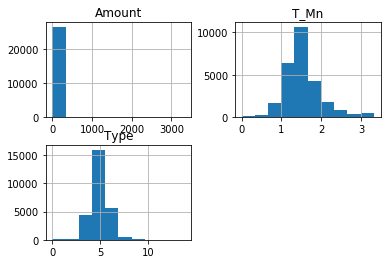

In [7]:
#Since standard deviation for most columns is 0, dropping all those columns
X.hist()

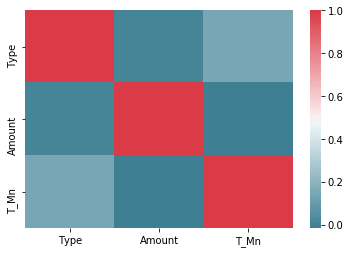

In [8]:
#corr = X.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=False)
#sns.heatmap(corr)

sns.heatmap(X.corr(), mask=np.zeros_like(X.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=False)
plt.show()

In [9]:
print(X.corr())

            Type    Amount      T_Mn
Type    1.000000  0.005781  0.145069
Amount  0.005781  1.000000 -0.015618
T_Mn    0.145069 -0.015618  1.000000


In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_test = scaler.transform(X_test)

y = y.values.reshape(-1,1)

y_Scaler = StandardScaler()
y_Scaler.fit(y)








/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
poly = PolynomialFeatures(degree=8)
X_ = poly.fit_transform(X)
X_test_ = poly.fit_transform(X_test)

In [12]:
model = LinearRegression()

model.fit(X, y)

print("Linear Regression Plain: Model Score: {}".format(model.score(X, y)))

model.fit(X_,y)
print("Linear Regression Polynomial with degree 8: {}".format(model.score(X_,y)))



Linear Regression Plain: Model Score: 0.0028800810236577767
Linear Regression Polynomial with degree 8: 0.011233009318053155


In [13]:
model2 = Lasso()

model2.fit(X_,y)
print("Lasso Regression, Model Score: {}".format(model2.score(X_, y)))


Lasso Regression, Model Score: 0.0002121665561950481


/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [14]:
model3 = ElasticNet(random_state=0)
model3.fit(X_,y)
print("ElastiNet Model Score: {}".format(model3.score(X_, y)))

ElastiNet Model Score: 0.0002737809896363741


/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [15]:
model4 = Ridge()
ridge_params = {'alpha': [0,0.5,1]}
ridge_grid = GridSearchCV(model4, ridge_params, cv=5)
ridge_grid.fit(X_,y)
print("Ridge Regression Model Score with grid: {}".format(ridge_grid.score(X_,y)))
model4.fit(X_,y)
print("Ridge Regression Model Score: {}".format(model4.score(X_,y)))

/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.096554e-24
  overwrite_a=True).T
/home/monica/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.419311e-23
  overwrite_a=True).T


Ridge Regression Model Score with grid: 0.011233156498083874
Ridge Regression Model Score: 0.011233156498083874


In [16]:
model5 = RandomForestRegressor(n_estimators= 500, min_samples_split=4, min_samples_leaf=2)

for i in range(5):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.30, random_state=i*34)
    model5.fit(X_train_1, y_train_1)
    
    
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.30, random_state=43)    
r2 = r2_score(y_test_1, model5.predict(X_test_1))
print("Random Forest Regressor: {}".format(r2))

/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/home/monica/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/home/monica/anaconda3/lib/python3.6/site-packages/i

Random Forest Regressor: 0.41820846055513394


In [17]:
model7 = xgb.XGBRegressor(n_estimators = 5000, learning_rate=0.01, objective='reg:linear')

for i in range(5):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.30, random_state=i*34)
    model7.fit(X_train_1, y_train_1)
    
    
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.30, random_state=43)    
r2 = r2_score(y_test_1, model7.predict(X_test_1))
print("XGB Regressor: {}".format(r2))

XGB Regressor: 0.07530520037797861


In [18]:
y_pred = model5.predict(X_test)

In [19]:
print(y_pred.shape)

(48434,)


In [20]:
print(X_test.shape)

(48434, 3)


In [24]:
sub_df1 = pd.DataFrame()
sub_df1['UID'] = test_data['UID']

In [25]:
sub_df1['bad_flag'] = pd.Series(y_pred)

In [27]:
sub_df1.to_csv('/home/monica/hdfc_bank_data/my_submission_1.csv')